In [9]:
import tushare as ts
import pandas as pd

import matplotlib.pyplot as plt
plt.style.use('bmh')

In [26]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [2]:
pro = ts.pro_api('bb228c0cc487c61510cc40872cadd3be501f483561b00aa3e080c60b')

In [4]:
stock_list = pro.query('stock_basic', exchange='', list_status='L', fields='ts_code,symbol,name,area,industry,list_date')

In [5]:
stock_list.head()

,ts_code,symbol,name,area,industry,list_date
0,000001.SZ,000001,平安银行,深圳,银行,19910403
1,000002.SZ,000002,万科A,深圳,全国地产,19910129
2,000004.SZ,000004,国农科技,深圳,生物制药,19910114
3,000005.SZ,000005,世纪星源,深圳,环境保护,19901210
4,000006.SZ,000006,深振业A,深圳,区域地产,19920427


In [15]:
industry_cnt = stock_list.groupby(by='industry').count().reset_index(False)

In [17]:
industry_cnt = industry_cnt[['industry', 'name']]

In [18]:
industry_cnt.columns = ['industry', 'cnt']

In [28]:
industry_top30 = industry_cnt.sort_values(by='cnt', ascending=False).head(30)

In [38]:
industry_top30

,industry,cnt
93,软件服务,172
7,元器件,170
73,电气设备,170
18,化工原料,156
60,汽车配件,132
0,专用机械,130
97,通信设备,115
17,化学制药,93
36,建筑施工,86
1,中成药,75


In [3]:
cmb = pro.daily(ts_code='600036.SH', start_date='20010101', end_date='20190420')

cmb.trade_date = pd.to_datetime(cmb.trade_date)
cmb = cmb.set_index(cmb.trade_date)

In [11]:
cmb.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount
trade_date,,,,,,,,,,,
2019-04-19,600036.SH,2019-04-19,35.60,36.45,35.58,36.00,35.50,0.50,1.4085,411748.63,1481680.330
2019-04-18,600036.SH,2019-04-18,35.80,35.80,35.13,35.50,35.83,-0.33,-0.9210,322740.70,1143221.193
2019-04-17,600036.SH,2019-04-17,35.89,36.48,35.63,35.83,36.00,-0.17,-0.4722,494789.82,1778194.094
2019-04-16,600036.SH,2019-04-16,34.70,36.10,34.60,36.00,34.82,1.18,3.3889,840815.16,2991158.275
2019-04-15,600036.SH,2019-04-15,35.42,36.22,34.82,34.82,34.80,0.02,0.0575,924920.92,3299629.416


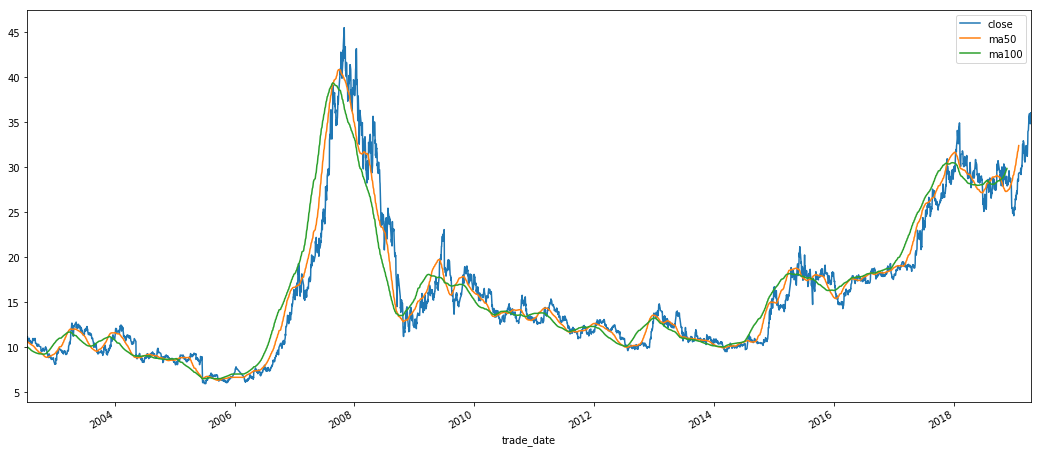

In [4]:
cmb['ma50'] = cmb['close'].rolling(50).mean()
cmb['ma100'] = cmb['close'].rolling(100).mean()
cmb[['close', 'ma50', 'ma100']].plot(label='DAL', figsize=(18, 8))

In [65]:
gtg = pro.daily(ts_code='300098.SZ', start_date='20000101', end_date='20190420')

In [49]:
gtg.dtypes

ts_code               object
trade_date    datetime64[ns]
open                 float64
high                 float64
low                  float64
close                float64
pre_close            float64
change               float64
pct_chg              float64
vol                  float64
amount               float64
dtype: object

In [66]:
gtg.trade_date = pd.to_datetime(gtg.trade_date)
gtg = gtg.set_index(gtg.trade_date)

Text(0, 0.5, 'PRICE')

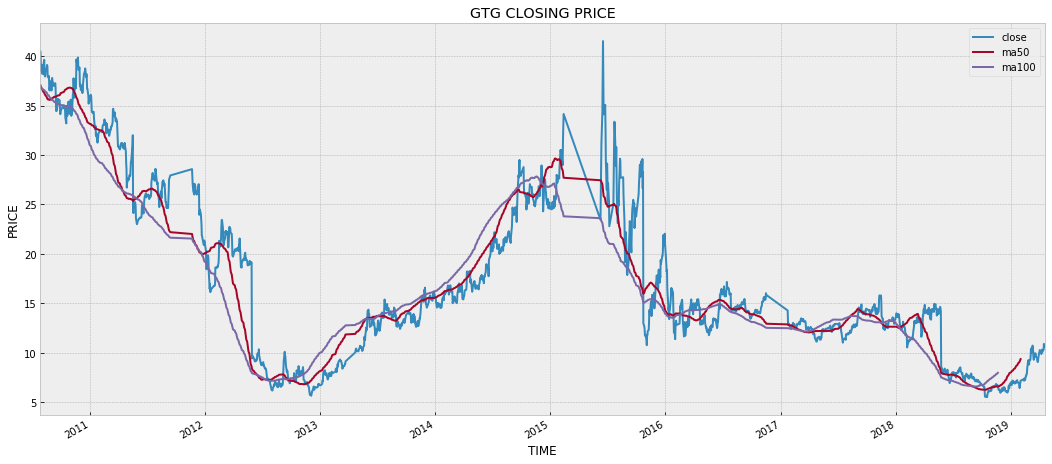

In [67]:
gtg['ma50'] = gtg['close'].rolling(50).mean()
gtg['ma100'] = gtg['close'].rolling(100).mean()
gtg[['close', 'ma50', 'ma100']].plot(label='DAL', figsize=(18, 8))
plt.title('GTG CLOSING PRICE')
plt.xlabel('TIME')
plt.ylabel('PRICE')

In [64]:
gtg.head()

,ts_code,trade_date,open,high,low,close,pre_close,change,pct_chg,vol,amount,ma50,ma100
trade_date,,,,,,,,,,,,,
2019-04-19,300098.SZ,2019-04-19,10.78,10.79,10.31,10.60,10.75,-0.15,-1.3953,366907.89,386696.133,NaN,NaN
2019-04-18,300098.SZ,2019-04-18,10.72,10.86,10.51,10.75,10.64,0.11,1.0338,409689.50,437966.476,NaN,NaN
2019-04-17,300098.SZ,2019-04-17,10.85,11.10,10.63,10.64,10.88,-0.24,-2.2059,551317.48,595492.800,NaN,NaN
2019-04-16,300098.SZ,2019-04-16,10.10,10.94,9.86,10.88,10.28,0.60,5.8366,854716.68,894663.632,NaN,NaN
2019-04-15,300098.SZ,2019-04-15,10.42,10.72,10.26,10.28,10.22,0.06,0.5871,649622.02,683372.734,NaN,NaN


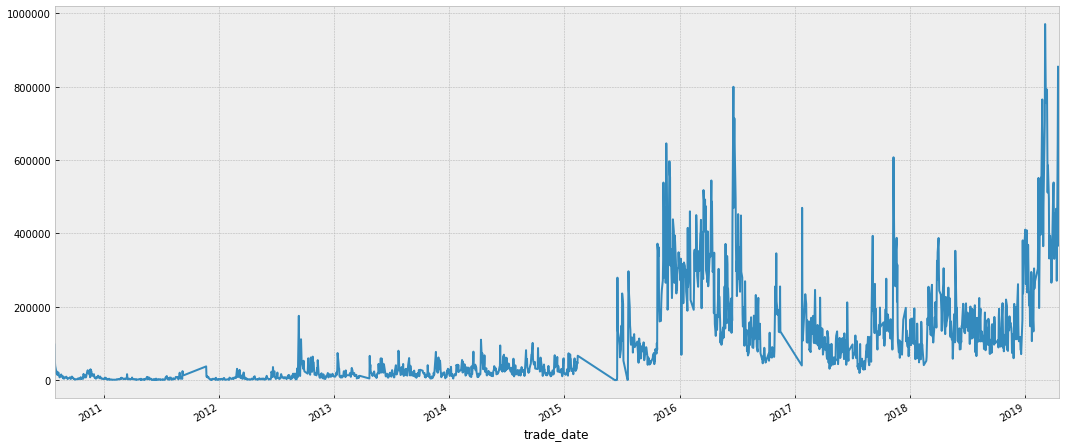

In [68]:
gtg['vol'].plot(label='DAL', figsize=(18, 8))

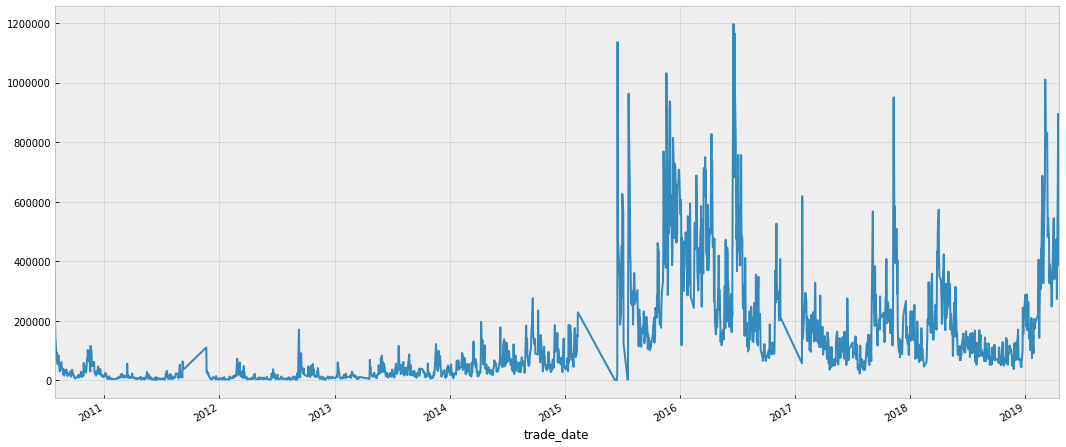

In [69]:
gtg['amount'].plot(label='DAL', figsize=(18, 8))

In [22]:
# gtg_cashflow = pro.cashflow(ts_code='300098.SZ', start_date='20100101', end_date='20190420')

# import datetime

# datetime.date.today()

ts_code = '600036.SH'

stock = pro.daily(ts_code=ts_code, start_date='20000101', end_date='{date:%Y%m%d}'.format(date=datetime.date.today()))

In [7]:
def ClosePrice(ts_code=None):
    import datetime

    stock = pro.daily(ts_code=ts_code, start_date='20000101', end_date='{date:%Y%m%d}'.format(date=datetime.date.today()))
    stock = stock.set_index(pd.to_datetime(stock.trade_date))
    
    stock['ma50'] = stock['close'].rolling(50).mean()
    stock['ma100'] = stock['close'].rolling(100).mean()
    stock[['close', 'ma50', 'ma100']].plot(label='DAL', figsize=(18, 8))
    plt.title('CLOSING PRICE of '+ts_code)
    plt.xlabel('TIME')
    plt.ylabel('PRICE')
    return None

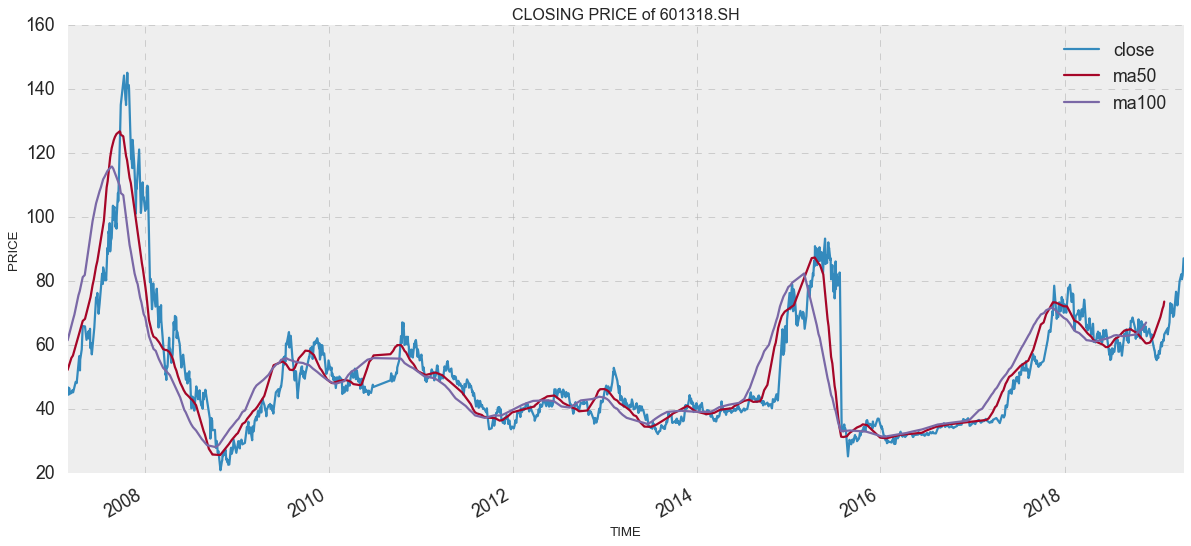

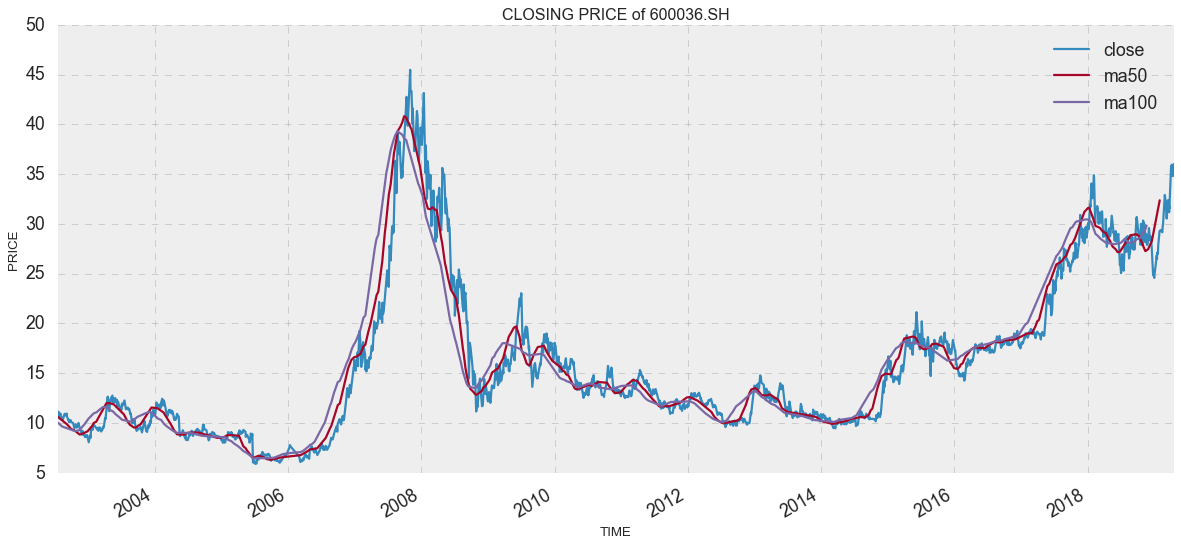

In [10]:
long_list = ['601318.SH', '600036.SH']

for s in long_list:
    ClosePrice(s)